# [IAPR 2019:][iapr2019] Special project

**Group members:**
    1- first name and last name,
    2- first name and last name,
    3- first name and last name

**Due date:** 30.05.2019

[iapr2019]: https://github.com/LTS5/iapr-2019


## Description
Please find the description of this special project via [this link].

[this link]: https://github.com/LTS5/iapr-2019/blob/master/project/special_project_description.pdf

## Part 2: Implement your first detector

Write your function(s) for the second part. Feel free to change the name of the function and add your additional functions, but please make sure their input and output follows the mentioned format.

Add your implementation. Report the Precision, Recall and F1-score, by using all 50 images of the test-set, and considering 0.3 as the IoU threshold.

In [1]:
%reload_ext autoreload

from itertools import product
from IPython.core.debugger import set_trace
from numpy.random import randint
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import skimage
import matplotlib.patches as patches
from description import parse_file, load_no_bug_annotations,\
    load_bug_annotations, sliding_window, get_performance_scores,\
    create_dataset, pca_extract, visualise_bboxes, sift_extract, combined_extract, fd_extract, segment

def detection_by_method_2(img, clf):
    return segment(img, clf)

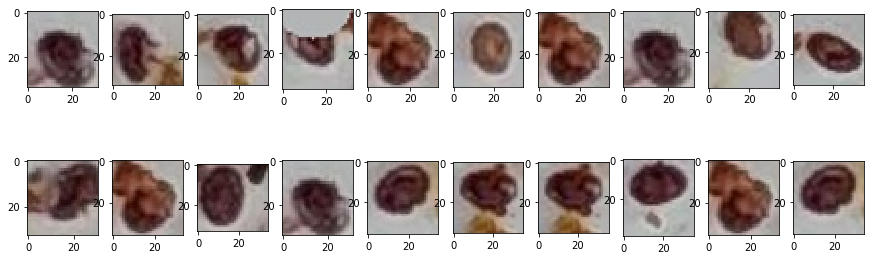

In [2]:
# Plot the bugs
%autoreload

bug_annotations = load_bug_annotations('train', n_bboxes=20)

M, N = 2, 10

fix, ax = plt.subplots(M, N, figsize=(15, 5))

for i, j in product(range(M), range(N)):
    vaorra_index = randint(0, len(bug_annotations))
    img = bug_annotations[vaorra_index]['bbox_img']
    ax[i, j].imshow(img)

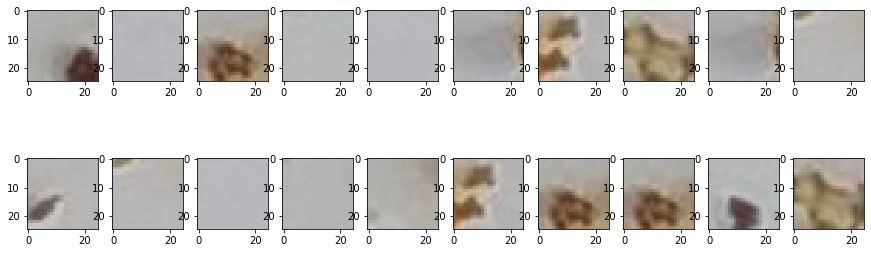

In [3]:
# Plot no bugs

no_bug_annotations = load_no_bug_annotations('train', n_bboxes=20)

M, N = 2, 10

fix, ax = plt.subplots(M, N, figsize=(15, 5))

for i, j in product(range(M), range(N)):
    vaorra_index = randint(0, len(no_bug_annotations))
    img = no_bug_annotations[vaorra_index]['bbox_img']
    ax[i, j].imshow(img)

In [4]:
# Create train dataset
%autoreload

X_train, y_train = create_dataset('train', n_bboxes=2000)

Fourier Descriptor based extraction has been started...
Fourier Descriptor based extraction is done


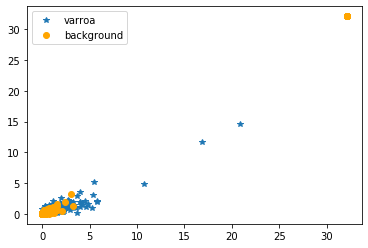

In [5]:
%autoreload

X_train_fd = fd_extract(X_train)

# Plot
background = X_train_fd[np.array(y_train) == 0]
target = X_train_fd[np.array(y_train) == 1]

plt.plot(target[:, 0], target[:, 1], '*', label='varroa')
plt.plot(background[:, 0], background[:, 1], 'o', label='background', color='orange')
plt.legend()

PCA based extraction has been started...
PCA based extraction is done...


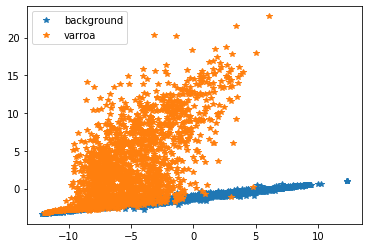

In [6]:
%autoreload

X_train_pca, pca_model = pca_extract(X_train, grayscale=True)
# X_train_pca = X_train_pca / np.max(X_train_pca)

# Plot
background = X_train_pca[np.array(y_train) == 0]
target = X_train_pca[np.array(y_train) == 1]

plt.plot(background[:, 0], background[:, 1], '*', label='background')
plt.plot(target[:, 0], target[:, 1], '*', label='varroa')
plt.legend()

SIFT based extraction has been started...
SIFT based extraction is done...


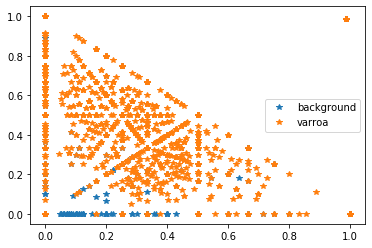

In [7]:
%autoreload

X_train_sift = sift_extract(X_train)

# Plot
background = X_train_sift[np.array(y_train) == 0]
target = X_train_sift[np.array(y_train) == 1]

plt.plot(background[:, 0], background[:, 1], '*', label='background')
plt.plot(target[:, 0], target[:, 1], '*', label='varroa')
plt.legend()

In [8]:
%autoreload

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X_train_comb, pca_model = combined_extract(X_train)
del X_train

X_test, y_test = create_dataset('test', n_bboxes=1000)
X_test_comb, _ = combined_extract(X_test, pca_model=pca_model)
del X_test

params = {'C': [100, 250, 500 ], 'gamma': [ 0.05, 0.1, 0.2 ]}
svc = SVC(class_weight='balanced', probability=True)
clf = GridSearchCV(svc, params, cv=5)
clf = clf.fit(X_train_comb, y_train)

print()
print('Best classifier')
print(clf.best_estimator_)

y_pred = clf.predict(X_test_comb)

print()
print('Classification report')
print(classification_report(y_test, y_pred, target_names=['background', 'varroa']))

PCA based extraction has been started...
PCA based extraction is done...
SIFT based extraction has been started...
SIFT based extraction is done...
Fourier Descriptor based extraction has been started...
Fourier Descriptor based extraction is done
Combining results...
PCA based extraction has been started...
PCA based extraction is done...
SIFT based extraction has been started...
SIFT based extraction is done...
Fourier Descriptor based extraction has been started...
Fourier Descriptor based extraction is done
Combining results...

Best classifier
SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Classification report
              precision    recall  f1-score   support

  background       1.00      0.98      0.99      2455
      varroa       0.91      0.98      0.94       582

   micro avg       0.98      0

segment(...) v0.1
Loading windows...
Running classifier...
PCA based extraction has been started...
PCA based extraction is done...
SIFT based extraction has been started...
SIFT based extraction is done...
Fourier Descriptor based extraction has been started...
Fourier Descriptor based extraction is done
Combining results...
Classifing bounding boxes...
Filtering bounding boxes...
14 8


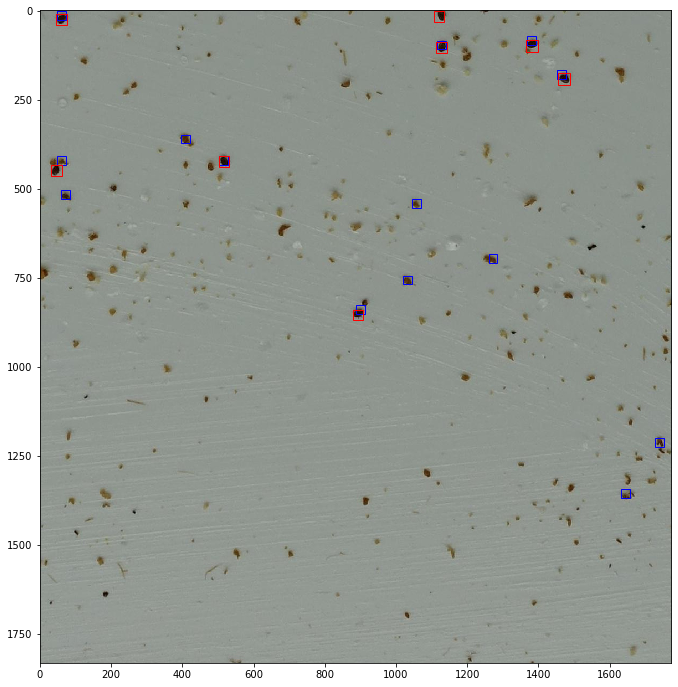

In [18]:
%autoreload

img_name = '59ef06a3a07d563535ffc6c9_32.00px_13'
filename = f'../project-data/images/test/{img_name}.jpg'
xml = f'../project-data/annotations/test/{img_name}.xml'
img = skimage.io.imread(filename)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(img)

bboxes = segment(img, clf, pca_model=pca_model)

for x, y, w, h in bboxes:
    rect = patches.Rectangle((x, y), w, h, linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)
        
annots = parse_file(xml)
for annot in annots:
    bbox = annot['bbox']
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    
    
print(len(bboxes), len(annots))

In [21]:
%autoreload

all_annots = []
all_bboxes = []

for img_index, file in enumerate(sorted(glob(f'../project-data/annotations/test/*.xml'), reverse=True)):
    print(f'Evaluating image #{img_index} ({file})')
    
    img_filename = file.replace('.xml', '.jpg').replace('annotations', 'images')
    
    img = skimage.io.imread(img_filename)
    bboxes = segment(img, clf, pca_model=pca_model)
    annots = parse_file(file)
    
    all_annots.append(annots)
    all_bboxes.append(bboxes)
    
    if img_index >= 2:
        break

Evaluating image #0 (../project-data/annotations/test/5c003119a07d5676543eb99d_32.00px_19.xml)
segment(...) v0.1
Loading windows...
Running classifier...
PCA based extraction has been started...
PCA based extraction is done...
SIFT based extraction has been started...
SIFT based extraction is done...
Fourier Descriptor based extraction has been started...
Fourier Descriptor based extraction is done
Combining results...
Classifing bounding boxes...
Filtering bounding boxes...
Evaluating image #1 (../project-data/annotations/test/5bfacb9ea07d568353ddcf2b_32.00px_4.xml)
segment(...) v0.1
Loading windows...
Running classifier...
PCA based extraction has been started...
PCA based extraction is done...
SIFT based extraction has been started...
SIFT based extraction is done...
Fourier Descriptor based extraction has been started...
Fourier Descriptor based extraction is done
Combining results...
Classifing bounding boxes...
Filtering bounding boxes...
Evaluating image #2 (../project-data/anno

In [25]:
%autoreload

get_performance_scores(all_annots, all_bboxes, 0.3)

Precision = 0.37
Recall = 0.39
F1-score = 0.38


(0.3684210526315789, 0.3888888888888889, 0.37837837837837834)